In [1]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
    !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
    !git fetch --all
    !git reset --hard origin/master

In [2]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
#     !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
#     !git pull

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import importlib
import tradestats
import pandas as pd
from datetime import datetime

In [5]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# import graphviz

In [6]:
importlib.reload(tradestats)
from tradestats import *

In [7]:
prices = loaddata_1D('AUDUSD_Candlestick_1_D_BID_03.08.2003-24.10.2021.csv')
# prices = loaddata_1D('EURUSD_Candlestick_1_D_BID_03.08.2003-24.10.2021.csv')

In [8]:
len(prices)

4753

In [9]:
importlib.reload(tradestats)
from tradestats import *
starttime = datetime.now()

maKey  = [5,10,20,30,40,50,60,80,100,120,130,140,160]
atrKey = [20]
# srsKey = [0]
dictList = []
colFeat = []
keyList = []
maDict   = ma2(prices, maKey)
atrDict  = atr(prices, atrKey)
# srsDict  = srs(prices, srsKey)
dictList.append(maDict.df); colFeat.append('ma'); keyList.append(maKey) 
dictList.append(atrDict.df); colFeat.append('atr'); keyList.append(atrKey) 
# dictList.append(srsDict.df); colFeat.append('srs'); keyList.append(srsKey) 

endtime = datetime.now()
print(str(endtime - starttime))

0:00:00.533991


In [10]:
# prices.dropna(inplace=True)
masterFrame = pd.DataFrame(index=prices.index)
masterFrame[['id','year','month','day','date','weekday','open','high','low','close','volume']] = prices[['id','year','month','day','date','weekday','open','high','low','close','volume']]   

In [11]:
for i in range(0,len(dictList)):#iteracja po funkcjach
    for j in keyList[i]: #iteracja po okresach
        for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
            colID = colFeat[i] + str(j) + k
            masterFrame[colID] = dictList[i][j][k]

In [12]:
# masterFrame.to_csv(sep=';',path_or_buf='../Data/masterFrame.csv',date_format="%Y-%m-%d",index = False,na_rep='')

In [13]:
masterFrame = masterFrame.dropna()

In [14]:
# masterFrame.tail(5)

In [24]:
importlib.reload(tradestats)
from tradestats import *
starttime = datetime.now()
atrperiod = 'atr20atr_prev'
sl = [0.3,0.5,0.7,0.9]
# tp = [0.4]
# tsl = [0,0.1]
tp = [0.4,0.6,0.8,1,1.2]
tsl = [0,0.1,0.3,0.5,0.7,0.9]
# alltrades = preparetrades_brut_tsl(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2015,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],2003,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[-1,1],[0.5],[0.9],2020,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.3,0.4,0.5,0.6,0.7,0.8,0.9],[0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[1,1.2,1.4,1.6,1.8,2,2.2],[1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2],2003,2021,atrperiod)
alltrades = preparetrades_brut_tsl(masterFrame,[1],sl,tp,tsl,2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],2003,2021,atrperiod)
endtime = datetime.now()
print(str(endtime - starttime))

0.3 : 0.4 : 0 : -5  open: 0
0.3 : 0.4 : 0.1 : -7  open: 1
0.3 : 0.4 : 0.3 : -10  open: 1
0.3 : 0.4 : 0.5 : -15  open: 1
0.3 : 0.4 : 0.7 : -26  open: 1
0.3 : 0.4 : 0.9 : -31  open: 1
0.3 : 0.6 : 0 : -5  open: 0
0.3 : 0.6 : 0.1 : -11  open: 1
0.3 : 0.6 : 0.3 : -11  open: 1
0.3 : 0.6 : 0.5 : -15  open: 1
0.3 : 0.6 : 0.7 : -26  open: 1
0.3 : 0.6 : 0.9 : -31  open: 1
0.3 : 0.8 : 0 : -9  open: 1
0.3 : 0.8 : 0.1 : -11  open: 1
0.3 : 0.8 : 0.3 : -12  open: 2
0.3 : 0.8 : 0.5 : -15  open: 2
0.3 : 0.8 : 0.7 : -26  open: 2
0.3 : 0.8 : 0.9 : -31  open: 2
0.3 : 1 : 0 : -11  open: 1
0.3 : 1 : 0.1 : -12  open: 1
0.3 : 1 : 0.3 : -12  open: 2
0.3 : 1 : 0.5 : -18  open: 2
0.3 : 1 : 0.7 : -26  open: 2
0.3 : 1 : 0.9 : -31  open: 2
0.3 : 1.2 : 0 : -13  open: 2
0.3 : 1.2 : 0.1 : -14  open: 2
0.3 : 1.2 : 0.3 : -16  open: 2
0.3 : 1.2 : 0.5 : -18  open: 2
0.3 : 1.2 : 0.7 : -26  open: 2
0.3 : 1.2 : 0.9 : -31  open: 2
0.5 : 0.4 : 0 : -6  open: 0
0.5 : 0.4 : 0.1 : -8  open: 1
0.5 : 0.4 : 0.3 : -11  open: 1
0.5 : 0

In [25]:
importlib.reload(tradestats)
from tradestats import *
trades = cleartrades_brut(alltrades.copy(),False)
# trades,alltrades = preparetrades(masterFrame,[-1,1],[5],[13],[0.002],True)

trades_len:  550824


In [26]:
#____________________________________________________________________________________________________________________
#
#
# alltrades.head(2)

In [228]:
def runstats_test2(alltrades,ma1,atrperiod,sl,tp,tsl,fxs=False):
    ma2 = '5'
    stats = runstats_ma_test2(alltrades,'ma'+ma1+'SMAdiffseq_prev', 'ma'+ma1+'SMAdiffdiff_prev','ma'+ma1+'SMAvs'+ma2+'_prev', 'ma'+ma2+'SMAdiffseq_prev', 'ma'+ma2+'SMAdiffdiff_prev',atrperiod,sl,tp,tsl,fxs)
    return stats

def runstats_ma_test2(alltrades,a,b,vs,aa,bb,atr,sl,tp,tsl,fxs=False):
    conf   = {}
    params = {}

    params['tradetype'] = [2,[1]]
    params['sl'] =        [2,sl]
    params['tp'] =        [2,tp]
    params['tsl'] =       [2,tsl]
    params[atr]  =        [3,[-1000],[0.015]]
    params[a]    =        [0,[1,2],[1000]]
    params[b]    =        [0,[-1000,0,1000],[-1000,0,1000]]
#     params[c]    =        [3,[0],[1000]]
    params[vs]    =        [3,[0],[1000]]
    params[aa]   =        [3,[2],[1000]]
    params[bb]   =        [0,[-1000,0,1000],[-1000,0,1000]]
#     params[cc]   =        [3,[-1000],[1000]]
    conf['filename'] =    'ma_test2_2003_2021_1_'+atr+'_'+vs
    print(conf['filename'])
    conf['fxs'] = fxs
    stats = stathyperparams2(alltrades,params,conf)
    return stats

In [224]:
importlib.reload(tradestats)
from tradestats import *
# for i in [10,14,20,30,40]:
for i in [20]:
    atrperiod = 'atr'+str(i)+'atr_prev'
    stats = runstats_test2(alltrades,'40',atrperiod,sl,tp,tsl)

ma_test2_2003_2021_1_atr20atr_prev_ma40SMAvs5_prev
allexecs:  2160
finish:         2021-12-22 22:37:41.481089
duration:       0:00:06.257940


ma_test2_2003_2021_1_atr20atr_prev_ma40SMAvs5_prev
allexecs:  2160
           tradetype      1
                  sl    0.3
                  tp      1
                 tsl      0
       atr20atr_prev  -1000  0.015
 ma40SMAdiffseq_prev      1   1000
ma40SMAdiffdiff_prev  -1000      0
     ma40SMAvs5_prev      0   1000
  ma5SMAdiffseq_prev      2   1000
 ma5SMAdiffdiff_prev  -1000      0
{'ii': 0, 'c': 332, 'cu': 100, 'cd': 232, 'p_sm': 2534.2230000000086, 'maxp': 2574.8875000000057, 'maxd2': -343.4359999999974, 'mu': 0, 'md': 0, 'avgsl': 25.947939759036156, 'r': 97.66567301812415, 'd': -13.235578746879073, 'rd2': 7.497430380041769}
--------------OR--------------
           tradetype      1
                  sl    0.3
                  tp      1
                 tsl      0
       atr20atr_prev  -1000  0.015
 ma40SMAdiffseq_prev      1   1000
ma40SMAdiffdiff_prev      0   1000
     ma40SMAvs5_prev      0   1000
  ma5SMAdiffseq_prev      2   1000
 ma5SMAdiffdiff_prev      0   1000
{'ii': 0

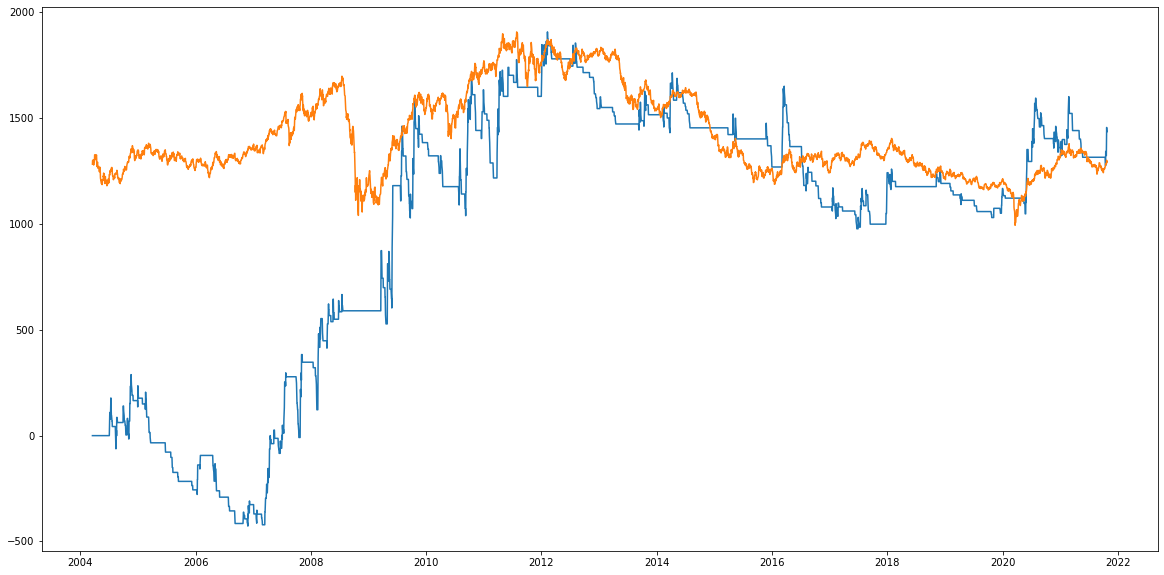

In [229]:
importlib.reload(tradestats)
from tradestats import *
# for i in [10,14,20,30,40]:
for i in [20]:
    atrperiod = 'atr'+str(i)+'atr_prev'
    fxs=runstats_test2(alltrades,'40',atrperiod,sl,tp,tsl,True)

sub = calcandplot(alltrades,fxs,[325,333])    